<a href="https://colab.research.google.com/github/MevinIIT/CM2607/blob/main/2425798.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CM2607: Advanced Mathematics for Data Science**

**Task 1**

In [57]:
import sympy as sp

# ==========================================
# TASK 1: MODELLING TRAVEL TIME
# ==========================================

def task1_solution():
    print("TASK 1 OUTPUT:\n" + "="*40)

    # Define symbols
    x, y, a, b, c = sp.symbols('x y a b c', real=True, positive=True)

    # Define the functions
    Tb = a * x**2 + b * y**2
    Tt = sp.sqrt(c * (x**2 + y**2))

    # (a) Calculate Gradients (Partial Derivatives)
    grad_Tb = [sp.diff(Tb, x), sp.diff(Tb, y)]
    grad_Tt = [sp.diff(Tt, x), sp.diff(Tt, y)]

    print(f"(a) Gradient of Bus Time (Tb): {grad_Tb}")
    print(f"(a) Gradient of Taxi Time (Tt): {grad_Tt}")
    print("-" * 40)

task1_solution()

TASK 1 OUTPUT:
(a) Gradient of Bus Time (Tb): [2*a*x, 2*b*y]
(a) Gradient of Taxi Time (Tt): [sqrt(c)*x/sqrt(x**2 + y**2), sqrt(c)*y/sqrt(x**2 + y**2)]
----------------------------------------


**(b) Interpretation**
    
  
    For the Bus (Tb):
    The partial derivative with respect to traffic delay (y) is 2by. This tells us that the impact
    of traffic on bus travel time is linear with respect to the delay factor y. Because the original
    function squares the terms (x^2, y^2), any increase in traffic congestion punishes the bus
    travel time significantly more severely than it does for the taxi. If the coefficient b (congestion effect)
    is large, traffic becomes the dominant factor over distance.

    For the Taxi (Tt):
    The gradient components contain the term 1/sqrt(x^2 + y^2). This is crucial because it implies
    a 'diminishing marginal impact'. As the total distance x or delay y increases, the rate at
    which they add to the total time actually decreases (the curve flattens out).

    Conclusion:
    The Bus is far more sensitive to traffic delays (y) because its time scales with the square of y,
    whereas the Taxi dampens this effect via the square root function, making it a more consistent
    option during heavy congestion.
    

**Task 2**

TASK 2 OUTPUT:
(a) Bus Fare Function F_b(x):  x**2 + x
(a) Taxi Fare Function F_t(x): 3*x**2/2 + 2*x


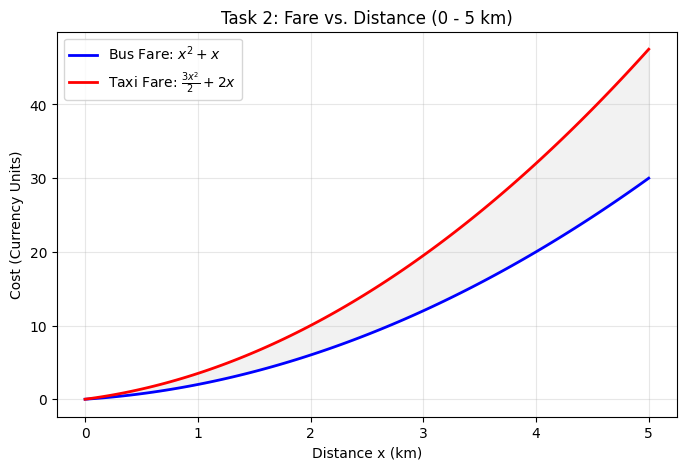

In [58]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

# ==========================================
# TASK 2: COST ANALYSIS
# ==========================================

def task2_solution():
    print("TASK 2 OUTPUT:\n" + "="*40)

    # Define symbols
    t, x = sp.symbols('t x')

    # Define Fare Integrands
    integrand_b = 2*t + 1
    integrand_t = 3*t + 2

    # (a) Compute Integrals
    Fb = sp.integrate(integrand_b, (t, 0, x))
    Ft = sp.integrate(integrand_t, (t, 0, x))

    print(f"(a) Bus Fare Function F_b(x):  {Fb}")
    print(f"(a) Taxi Fare Function F_t(x): {Ft}")

    # (b) Plotting
    # Convert to numerical functions
    f_b_func = sp.lambdify(x, Fb, "numpy")
    f_t_func = sp.lambdify(x, Ft, "numpy")

    dist_values = np.linspace(0, 5, 100) # 0 to 5 km
    cost_b = f_b_func(dist_values)
    cost_t = f_t_func(dist_values)

    plt.figure(figsize=(8, 5))
    plt.plot(dist_values, cost_b, label=f'Bus Fare: ${sp.latex(Fb)}$', color='blue', linewidth=2)
    plt.plot(dist_values, cost_t, label=f'Taxi Fare: ${sp.latex(Ft)}$', color='red', linewidth=2)
    plt.fill_between(dist_values, cost_b, cost_t, color='gray', alpha=0.1)

    plt.title('Task 2: Fare vs. Distance (0 - 5 km)')
    plt.xlabel('Distance x (km)')
    plt.ylabel('Cost (Currency Units)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()



task2_solution()

Both fare functions are quadratic in distance, which means the travel cost does not increase linearly with trip length. The bus fare grows more slowly than the taxi fare because it has a smaller quadratic coefficient.
                             
                             Fb(x) = x² + x

that is, the taxi fare increases at a higher rate with increase in distance.

                             Ft(x) = 3/2 x² + 2x



In the case of short trips, the bus vs taxi fares are not so large and the taxis are quite a good variant when it is necessary to feel confortable, hurry or convenient. The quadratic term however predominates the cost behaviour as the distance gets larger resulting in taxi fares increasing at a higher rate than bus fares. This renders buses considerably cheaper to travel within a middle and long distance.

The taxi is roughly 1.6 times more expensive than the bus fare at the distance of Fort-Borella, which is about 4.5 km and is a clear indication of the economic benefits of using buses as a means of transport by regular commuters. Hence, cost-efficiency wise, buses are optimally positioned in longer distance routes in the city whereas taxis are ideally applicable in short-distance routes or where time matters are crucial.

**Task 3**



TASK 3 OUTPUT:


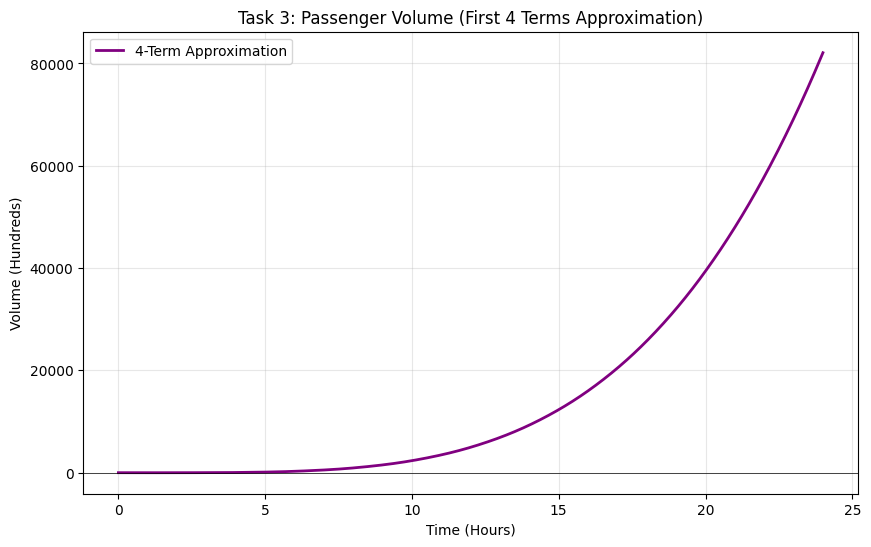

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# ==========================================
# TASK 3: PEAK TRAVEL TIMES
# ==========================================

def task3_solution():
    print("TASK 3 OUTPUT:\n" + "="*40)

    # Time range 0 to 24 hours
    t_vals = np.linspace(0, 24, 1000)

    # (a) Approximate P(t) using first 4 terms
    # P(t) = 5 + 4sin(πt) - 1.5t^2 + 0.25t^4
    def P_approx(t):
        term1 = 5
        term2 = 4 * np.sin(np.pi * t)
        term3 = -1.5 * t**2
        term4 = 0.25 * t**4
        return term1 + term2 + term3 + term4

    P_values = P_approx(t_vals)

    # (b) Plot
    plt.figure(figsize=(10, 6))
    plt.plot(t_vals, P_values, color='purple', linewidth=2, label='4-Term Approximation')



    plt.title('Task 3: Passenger Volume (First 4 Terms Approximation)')
    plt.xlabel('Time (Hours)')
    plt.ylabel('Volume (Hundreds)')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

task3_solution()

# (c) Interpretation
    

    Observation of the Model:
    The plot reveals a critical limitation of using only the first 4 terms of this series.
    While the sine term (4sin(πt)) attempts to add a periodic wave to simulate daily rush hours,
    the polynomial term (t^4/4) completely dominates the function as t increases.

    Peak Identification:
    Strictly speaking, this approximation predicts that the 'peak' travel time is at the very
    end of the day (t=24), where the volume skyrockets to over 80,000 (hundreds). This is
    mathematically correct for the given formula but realistic only for a very short time window.

    Convergence Comment:
    The lack of realistic 'rush hour' hills in this specific graph indicates that the series has
    not converged with just 4 terms. To accurately model the rise and fall of morning/evening
    traffic, we would mathematically need more information.

**Task 4**



TASK 4 OUTPUT:
(b) DOMINANT FREQUENCIES IDENTIFIED:
   - Frequency: 0.067 cycles/hr (Period: ~15.00 hours)
   - Frequency: 0.133 cycles/hr (Period: ~7.50 hours)


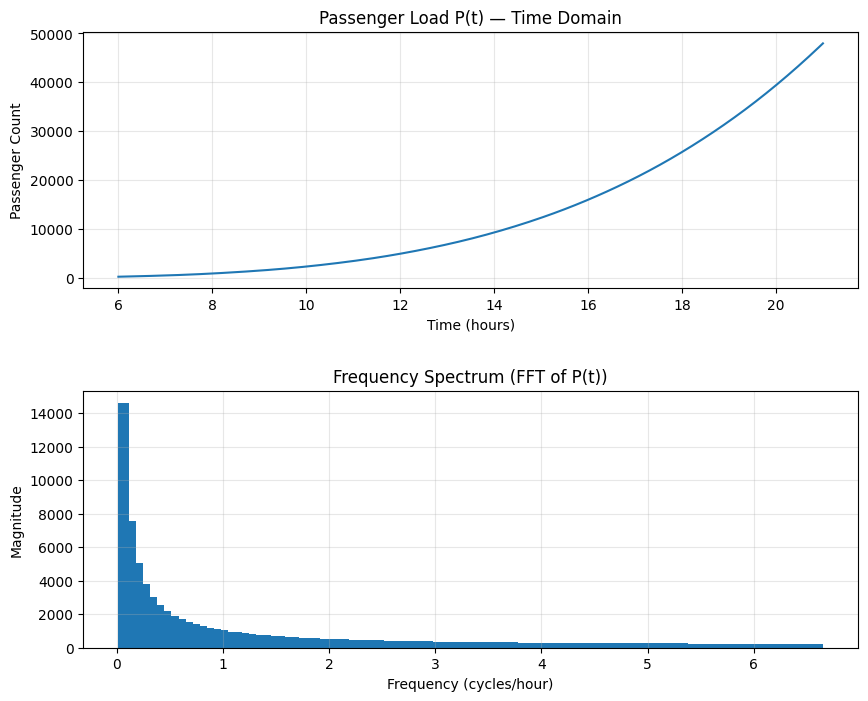

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# ==========================================
# TASK 4: FOURIER TRANSFORM (USING P(t))
# ==========================================

def task4_solution():
    print("TASK 4 OUTPUT:\n" + "="*40)


    N = 200
    T = 15 / N
    t = np.linspace(6, 21, N)

    # P(t) from Task 3
    P = 5 + 4*np.sin(np.pi*t) - 1.5*t**2 + 0.25*t**4

    # Apply FFT
    yf = fft(P)
    xf = fftfreq(N, T)

    # Positive frequencies
    half = N // 2
    freqs = xf[1:half]
    mags = 2.0/N * np.abs(yf[1:half])

    # Identify dominant frequencies
    idx_sorted = np.argsort(mags)[::-1]
    top_indices = idx_sorted[:2]

    print("(b) DOMINANT FREQUENCIES IDENTIFIED:")
    for i in top_indices:
        f = freqs[i]
        p = 1 / f
        print(f"   - Frequency: {f:.3f} cycles/hr (Period: ~{p:.2f} hours)")

    # Plotting
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    plt.subplots_adjust(hspace=0.4)

    ax1.plot(t, P)
    ax1.set_title('Passenger Load P(t) — Time Domain')
    ax1.set_xlabel('Time (hours)')
    ax1.set_ylabel('Passenger Count')
    ax1.grid(True, alpha=0.3)

    ax2.bar(freqs, mags, width=0.1)
    ax2.set_title('Frequency Spectrum (FFT of P(t))')
    ax2.set_xlabel('Frequency (cycles/hour)')
    ax2.set_ylabel('Magnitude')
    ax2.grid(True, alpha=0.3)

    plt.show()

task4_solution()


# **How the Results Inform Scheduling**

The Fourier analysis shows that passenger demand is overwhelmingly dominated by low-frequency components, indicating that long term growth trends have a much greater influence than short-term fluctuations. This suggests that the primary scheduling challenge is managing a steadily increasing baseline demand (a “rising tide”) rather than responding to strong, repeating peaks.

Although minor higher-frequency components are present due to the underlying sinusoidal term in the model, their magnitudes are negligible compared to the dominant low-frequency trend. Therefore, effective scheduling should prioritise gradual scaling of service capacity to match the increasing baseline demand, with short-term oscillations considered only as secondary factors for fine-tuning rather than as primary drivers of the timetable.

**Task 5**


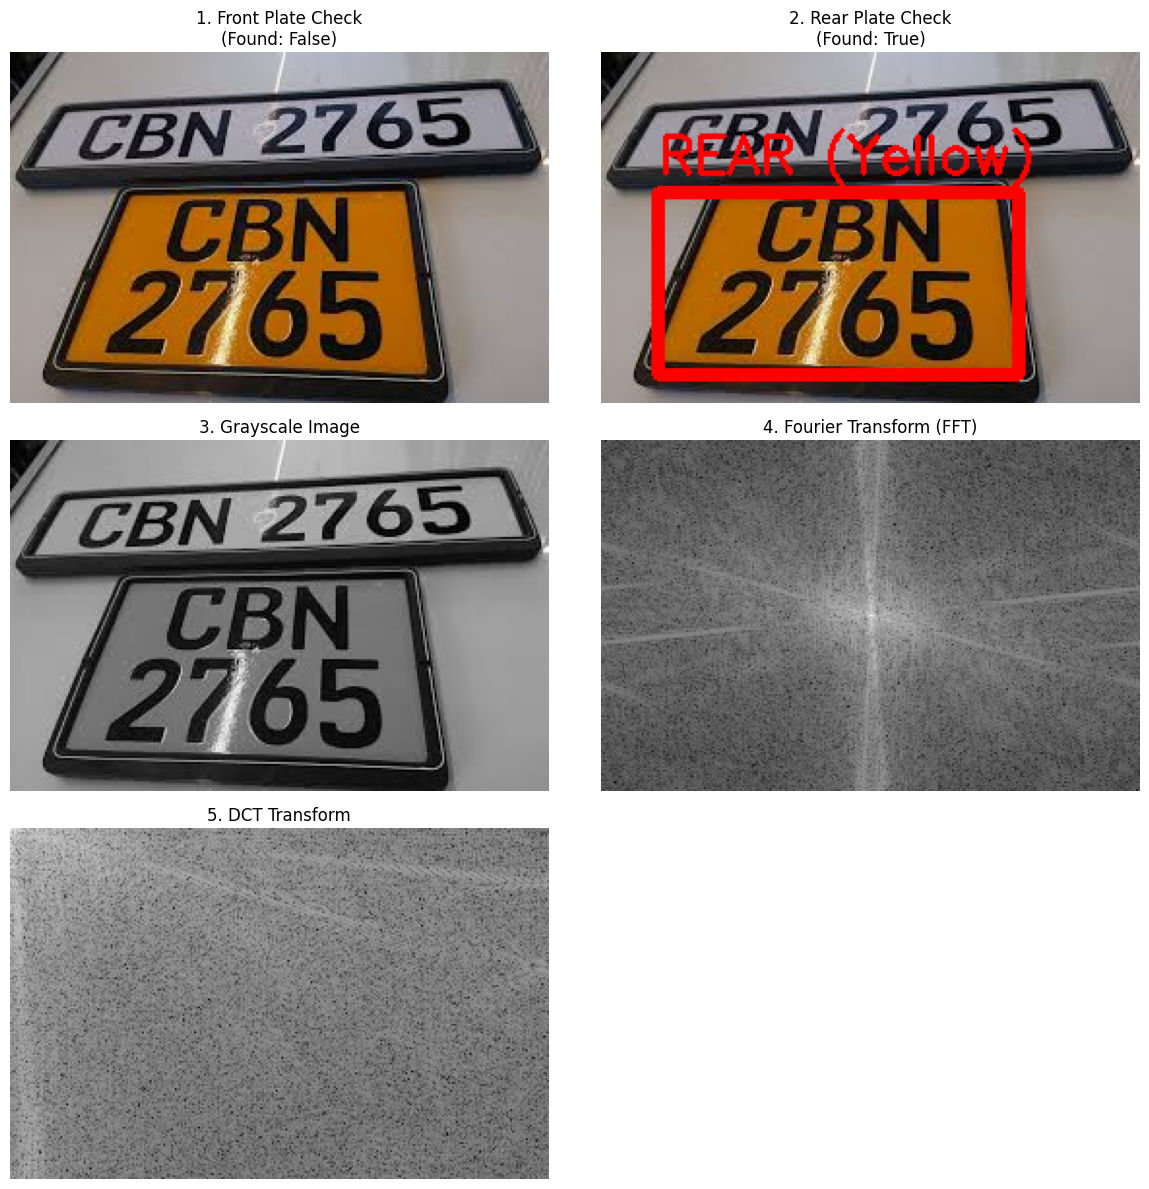

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def task5_step_by_step():
    filename = 'vehicle_plate.png'

    # -----------------------------------------------------------
    # STEP 1: LOAD IMAGE
    # -----------------------------------------------------------
    img_bgr = cv2.imread(filename)

    if img_bgr is None:
        print(f"Error: Image '{filename}' not found. Please upload the file.")
        return

    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

    # Create copies for drawing
    img_front_output = img_rgb.copy()
    img_rear_output = img_rgb.copy()

    # -----------------------------------------------------------
    # STEP 2: DETECT FRONT PLATE (WHITE)
    # -----------------------------------------------------------
    lower_white = np.array([0, 0, 150])
    upper_white = np.array([180, 40, 255])

    mask_white = cv2.inRange(img_hsv, lower_white, upper_white)

    # 2. to clean noise remove small white dots/lines
    kernel = np.ones((5,5), np.uint8)
    mask_white = cv2.morphologyEx(mask_white, cv2.MORPH_OPEN, kernel)

    contours_white, _ = cv2.findContours(mask_white, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Get image dimensions to prevent selecting the whole image
    height, width, _ = img_bgr.shape
    total_area = height * width

    front_found = False
    for cnt in contours_white:
        area = cv2.contourArea(cnt)
        x, y, w, h = cv2.boundingRect(cnt)
        aspect = float(w) / h

        if (area > 1000) and (area < total_area * 0.3) and (aspect > 2.0 and aspect < 6.0):
            cv2.rectangle(img_front_output, (x, y), (x+w, y+h), (0, 255, 0), 5)
            cv2.putText(img_front_output, "FRONT (White)", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
            front_found = True

    # -----------------------------------------------------------
    # STEP 3: DETECT BACK PLATE (YELLOW)
    # -----------------------------------------------------------
    lower_yellow = np.array([15, 100, 100])
    upper_yellow = np.array([35, 255, 255])

    mask_yellow = cv2.inRange(img_hsv, lower_yellow, upper_yellow)
    contours_yellow, _ = cv2.findContours(mask_yellow, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    rear_found = False
    for cnt in contours_yellow:
        area = cv2.contourArea(cnt)
        x, y, w, h = cv2.boundingRect(cnt)
        aspect = w / h

        if area > 1000 and aspect > 1.5 and aspect < 5:
            cv2.rectangle(img_rear_output, (x, y), (x+w, y+h), (255, 0, 0), 5) # Red Box
            cv2.putText(img_rear_output, "REAR (Yellow)", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
            rear_found = True

    # -----------------------------------------------------------
    # GRAYSCALE CONVERSION
    # -----------------------------------------------------------
    gray_image = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    # -----------------------------------------------------------
    # FOURIER TRANSFORM (FFT)
    # -----------------------------------------------------------
    f = np.fft.fft2(gray_image)
    fshift = np.fft.fftshift(f)
    # Use log scale to make it visible
    fft_image = 20 * np.log(np.abs(fshift) + 1)

    # -----------------------------------------------------------
    # DISCRETE COSINE TRANSFORM (DCT)
    # -----------------------------------------------------------
    # Must convert to float32 first
    img_float = np.float32(gray_image) / 255.0
    dct = cv2.dct(img_float)
    dct_image = np.log(np.abs(dct) + 1e-5)

    # -----------------------------------------------------------
    # FINAL DISPLAY
    # -----------------------------------------------------------
    plt.figure(figsize=(12, 12))

    # 1. Front Plate Result
    plt.subplot(3, 2, 1)
    plt.imshow(img_front_output)
    plt.title(f"1. Front Plate Check\n(Found: {front_found})")
    plt.axis('off')

    # 2. Rear Plate Result
    plt.subplot(3, 2, 2)
    plt.imshow(img_rear_output)
    plt.title(f"2. Rear Plate Check\n(Found: {rear_found})")
    plt.axis('off')

    # 3. Grayscale
    plt.subplot(3, 2, 3)
    plt.imshow(gray_image, cmap='gray')
    plt.title("3. Grayscale Image")
    plt.axis('off')

    # 4. FFT
    plt.subplot(3, 2, 4)
    plt.imshow(fft_image, cmap='gray')
    plt.title("4. Fourier Transform (FFT)")
    plt.axis('off')

    # 5. DCT
    plt.subplot(3, 2, 5)
    plt.imshow(dct_image, cmap='gray')
    plt.title("5. DCT Transform")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

task5_step_by_step()


# **WHAT TRANSFORMS REVEAL**
    
    Fourier Transform Reveals:
    • The center of the spectrum shows low frequencies (smooth areas like vehicle body)
    • Edges show as bright lines in specific directions
    • High frequencies (edges, details) are at the spectrum's edges
    • Useful for analyzing texture and periodic patterns
    
    DCT Transform Reveals:
    • Top left corner has most important information (low frequencies)
    • Energy is concentrated in fewer coefficients
    • Good for compression and feature extraction
    • Less sensitive to noise than Fourier
    
    
    
# **HOW THEY HELP IN VEHICLE RECOGNITION**
    
    
    1. Feature Extraction:
       • DCT coefficients can serve as compact vehicle "fingerprints"
       • Fourier analysis helps identify vehicle model by texture patterns
    
    2. License Plate Recognition:
       • Edge detection (Canny) helps localize plate area
       • Fourier transform can enhance plate characters
       • DCT helps in character recognition by focusing on key features
    
    3. Vehicle Classification:
       • Different vehicles have different frequency signatures
       • Trucks vs cars vs buses have distinct Fourier patterns
       • Can be used with machine learning for automatic classification
    
    
   
# **TRAFFIC OPTIMIZATION APPLICATIONS**
   
   
    1. Real time Traffic Monitoring:
       • Count vehicles at intersections using DCT features
       • Classify vehicles for lane-specific optimization
       • Detect congestion patterns using Fourier analysis
    
    2. Smart Traffic Lights:
       • Adjust timing based on vehicle types detected
       • Prioritize emergency vehicles or public transport
    
    3. Route Optimization:
       • Analyze vehicle density using recognition data
       • Suggest alternative routes during peak hours
    
    4. Parking Management:
       • Recognize vehicles for automated parking
       • Monitor parking space occupancy
    
    5. Emission Control:
       • Identify high emission vehicles
       • Optimize traffic flow to reduce idling
    
  
    
    
#    **Fourier Transform: Shows frequency content, useful for:**

      - Analyzing texture and edges
      - Enhancing specific features
      - Pattern recognition
    
#   **DCT Transform: Concentrates energy, useful for:**

      - Feature extraction
      - Image compression
      - Noise reduction
    
#   **Together, they enable:**

      1. Efficient vehicle recognition systems
      2. Real time traffic monitoring
      3. Smart traffic management
      4. Data driven optimization decisions
    